<a href="https://colab.research.google.com/github/hyuntaedo/FastCampus_DataMining_Problem/blob/main/Chapter_03_%EB%A1%A4_%EC%A2%80_%ED%95%98%EB%8B%88__%EC%9D%B4%EA%B2%83%EB%A7%8C_%ED%95%98%EB%A9%B4_%EB%AC%B4%EC%A1%B0%EA%B1%B4_%EC%9D%B4%EA%B8%B4%EB%8B%A4!_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%95%8C%EC%95%84%EB%B3%B4%EB%8A%94_%EB%A6%AC%EA%B7%B8_%EC%98%A4%EB%B8%8C_%EB%A0%88%EC%A0%84%EB%93%9C%EC%9D%98_%EC%8A%B9%EB%A6%AC_%EA%B3%B5%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 롤 좀 하니? '이것'만 하면 무조건 이긴다!<br> - 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kumahappy'
os.environ['KAGGLE_KEY'] = 'a6676c86b1e77caa856b2938ee49e939'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min

league-of-legends-diamond-ranked-games-10-min.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip -qq '/content/league-of-legends-diamond-ranked-games-10-min.zip'

replace high_diamond_ranked_10min.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: re
new name: re


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [67]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/high_diamond_ranked_10min.csv',encoding='utf-8')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [10]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [12]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [15]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [16]:
df.describe().mean()

gameId                          3.358371e+09
blueWins                        1.235250e+03
blueWardsPlaced                 1.278038e+03
blueWardsDestroyed              1.239875e+03
blueFirstBlood                  1.235376e+03
blueKills                       1.241024e+03
blueDeaths                      1.241009e+03
blueAssists                     1.242214e+03
blueEliteMonsters               1.235397e+03
blueDragons                     1.235230e+03
blueHeralds                     1.235072e+03
blueTowersDestroyed             1.235412e+03
blueTotalGold                   1.395268e+04
blueAvgLevel                    1.239978e+03
blueTotalExperience             1.439658e+04
blueTotalMinionsKilled          1.392820e+03
blueTotalJungleMinionsKilled    1.272676e+03
blueGoldDiff                    1.626033e+03
blueExperienceDiff              1.334281e+03
blueCSPerMin                    1.250669e+03
blueGoldPerMin                  2.506655e+03
redWardsPlaced                  1.281478e+03
redWardsDe

### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


In [21]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
df.corr(method='pearson',min_periods=1)[0:5]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479


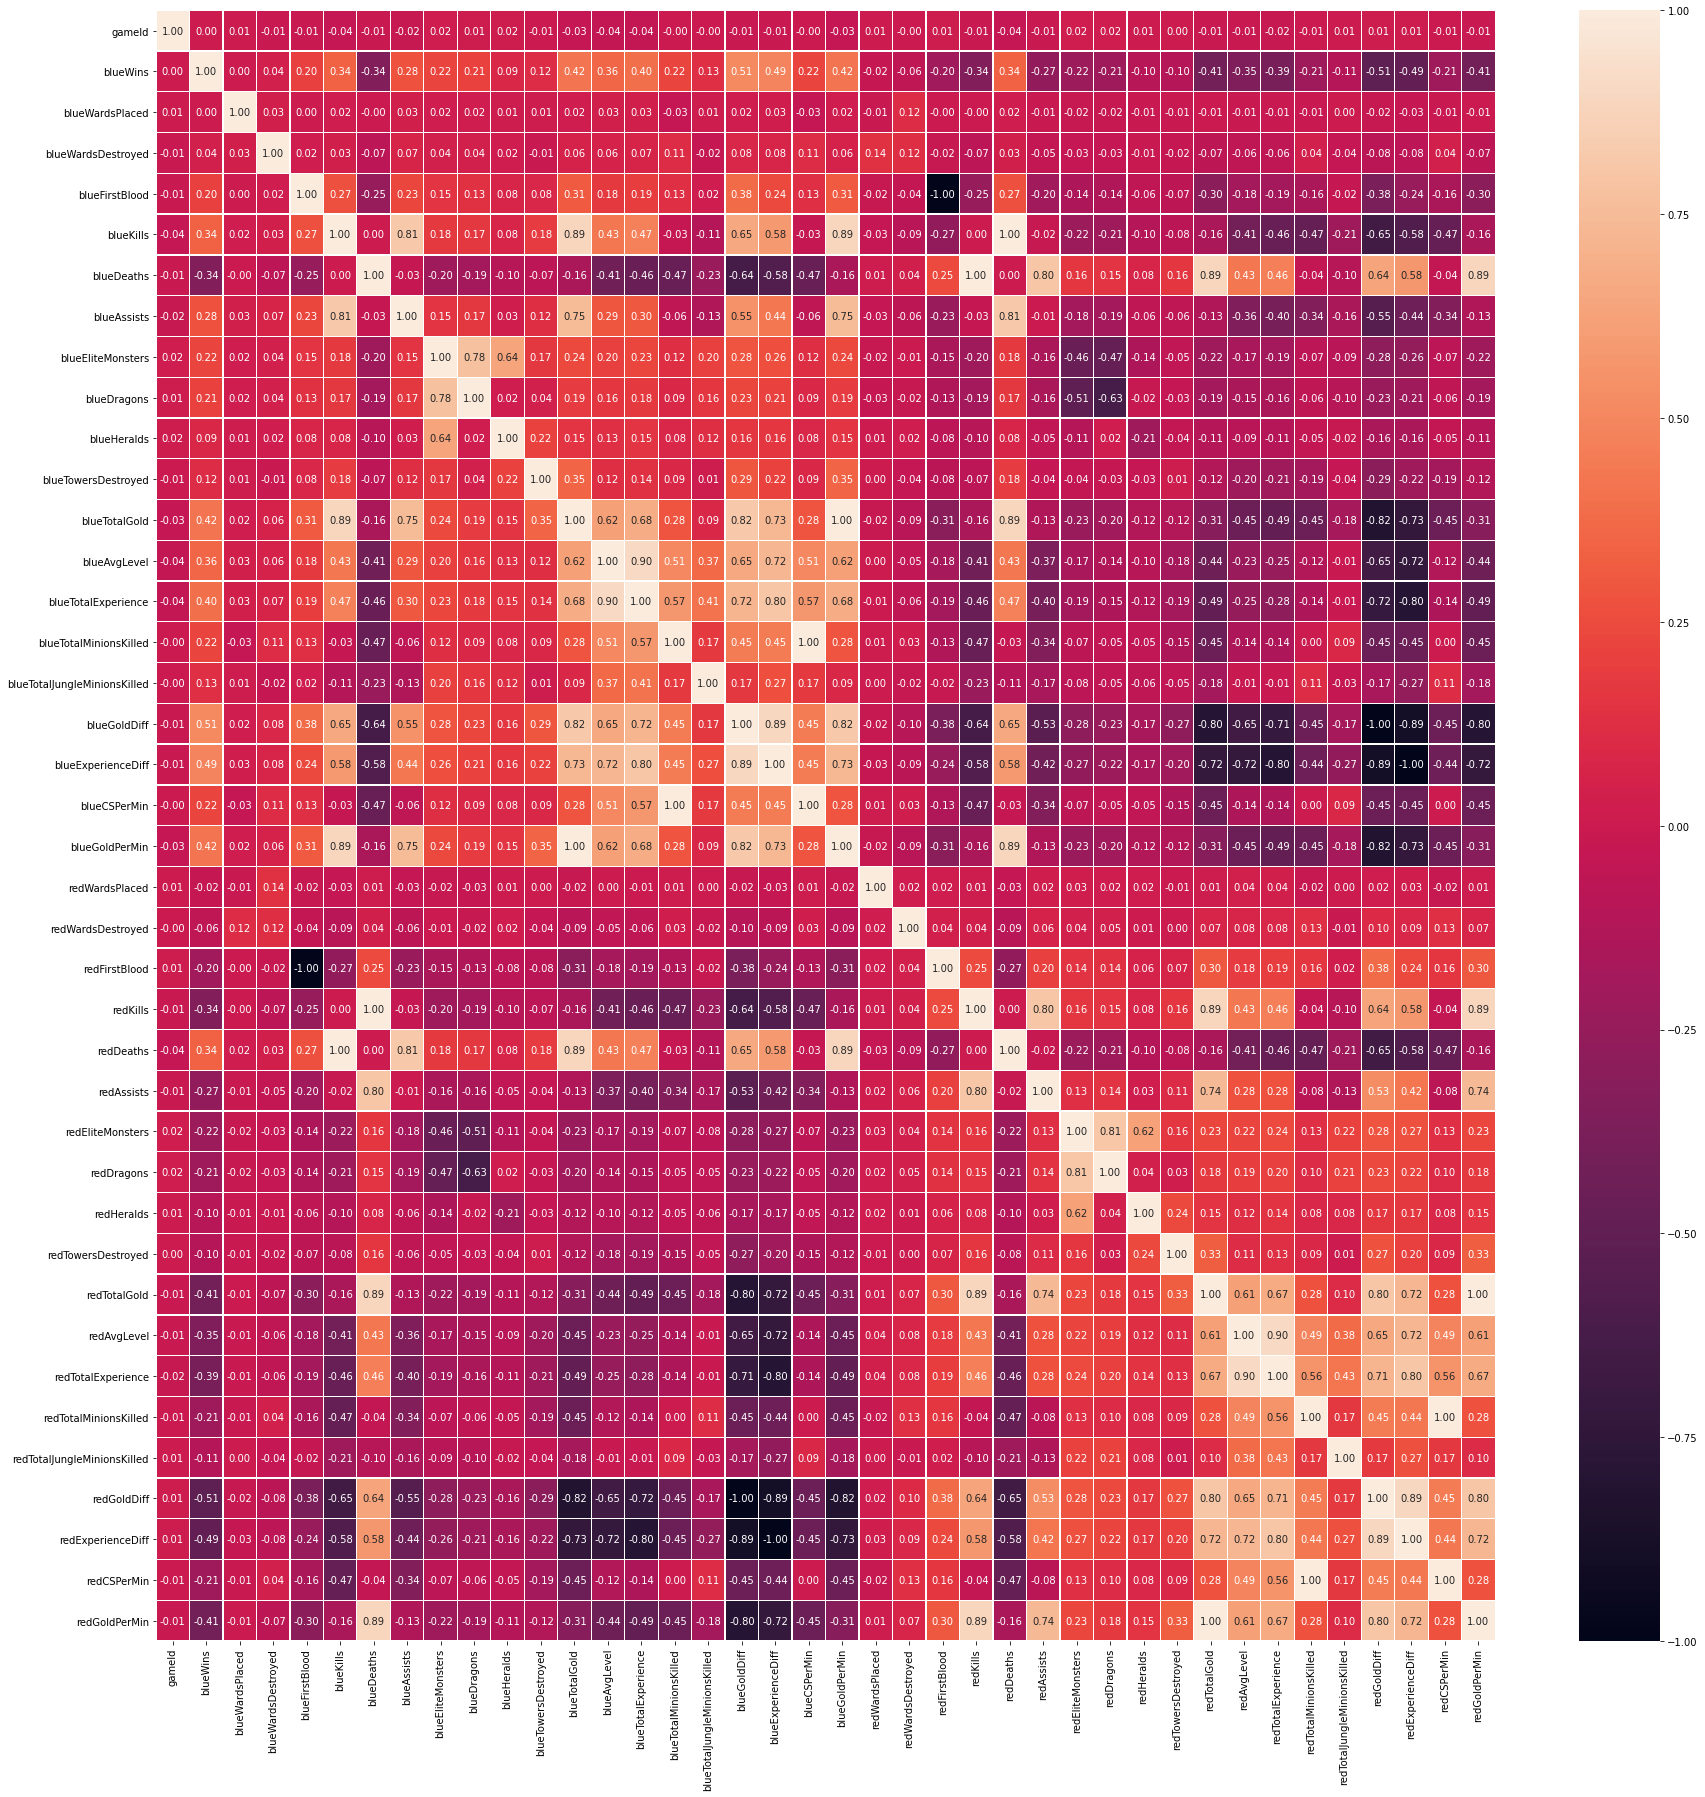

In [27]:
df.corr()
plt.figure(figsize=[30,30])
sns.heatmap(data=df.corr(),annot=True,cbar=True,fmt='.2f',linecolor='white',linewidths=0.3)

### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


In [28]:
df.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


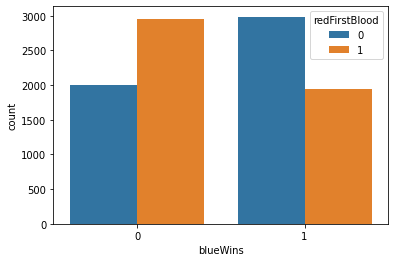

In [31]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화
sns.countplot(data=df,x='blueWins',hue='redFirstBlood')

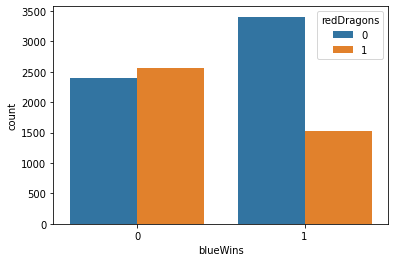

In [43]:
sns.countplot(data=df,x='blueWins',hue='redDragons')

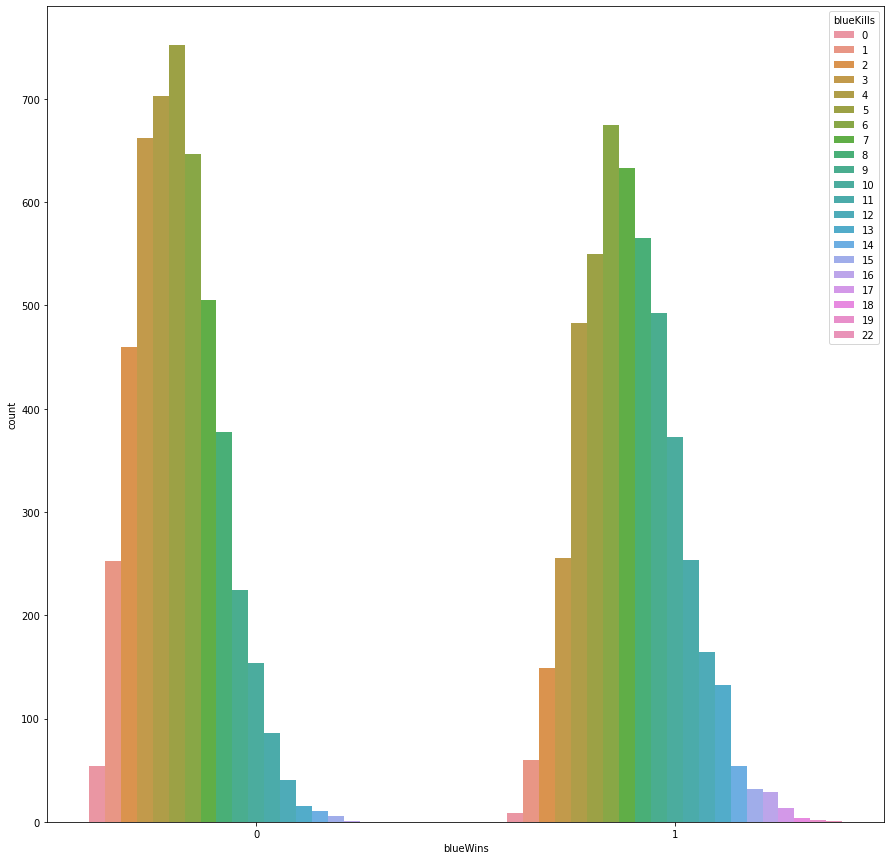

In [46]:
plt.figure(figsize=[15,15])
sns.countplot(data=df,x='blueWins',hue='blueKills')

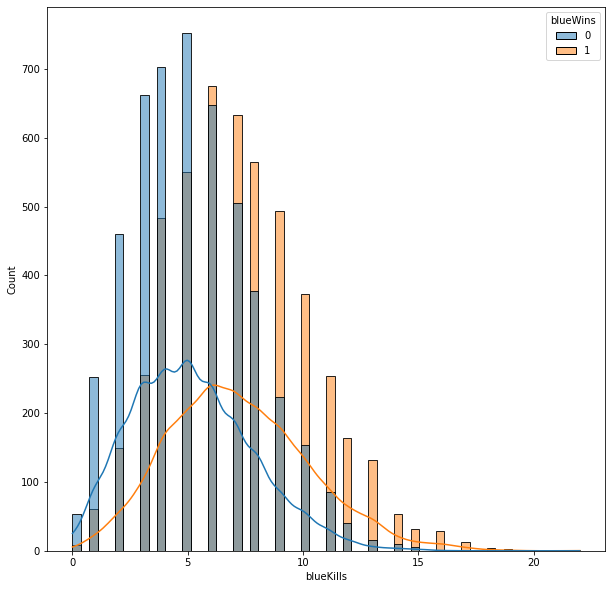

In [48]:
plt.figure(figsize=[10,10])
sns.histplot(data=df,x='blueKills',hue='blueWins',kde=True)

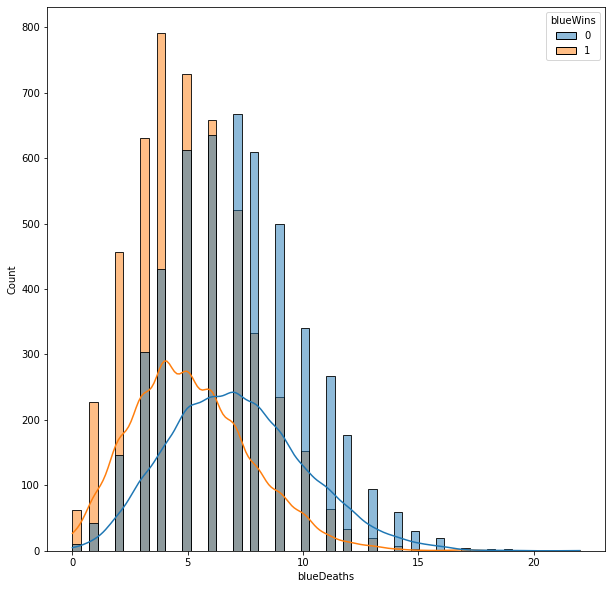

In [50]:
plt.figure(figsize=[10,10])
sns.histplot(data=df,x='blueDeaths',hue='blueWins',kde=True)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [68]:
df.drop([
        'gameId',
       'blueCSPerMin', 'blueGoldPerMin', 
       'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold','redTotalExperience','redExperienceDiff','redGoldDiff'
],axis=1,inplace=True)

In [70]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redDragons', 'redHeralds', 'redTowersDestroyed', 'redAvgLevel',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin',
       'redGoldPerMin'],
      dtype='object')

In [71]:
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,6.8,197,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,6.8,240,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,6.8,203,28,20.3,1728.5


In [78]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redTowersDestroyed', 'redAvgLevel',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin',
       'redGoldPerMin']]
X_cat = df[['blueFirstBlood','blueDragons','blueHeralds','redDragons','redHeralds']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)
X = pd.concat([X_num,X_cat],axis=1,)
y = df['blueWins']

In [79]:
X

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
0,28,2,9,6,11,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,6.8,197,55,19.7,1656.7,1,0,0,0,0
1,12,1,5,5,5,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,6.8,240,52,24.0,1762.0,0,0,0,1,1
2,15,0,7,11,4,1,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,6.8,203,28,20.3,1728.5,0,1,0,0,0
3,43,1,4,5,5,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,7.0,235,47,23.5,1647.8,0,0,1,0,0
4,75,4,6,6,6,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,0,7.0,225,67,22.5,1740.4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,7,4,5,1,0,17765,7.2,18967,211,69,2519,2469,46,3,7,0,0,6.8,229,34,22.9,1524.6,1,1,0,0,0
9875,54,0,6,4,8,1,0,16238,7.2,19255,233,48,782,888,12,21,3,0,0,7.0,206,56,20.6,1545.6,0,1,0,0,0
9876,23,1,6,7,5,0,0,15903,7.0,18032,210,45,-2416,-1877,14,0,11,1,0,7.4,261,60,26.1,1831.9,0,0,0,1,0
9877,14,4,2,3,3,1,0,14459,6.6,17229,224,48,-839,-1085,66,4,1,0,0,7.2,247,40,24.7,1529.8,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [85]:
from sklearn.metrics import classification_report

In [86]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1469
           1       0.74      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [88]:
from xgboost import XGBClassifier

In [89]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [90]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

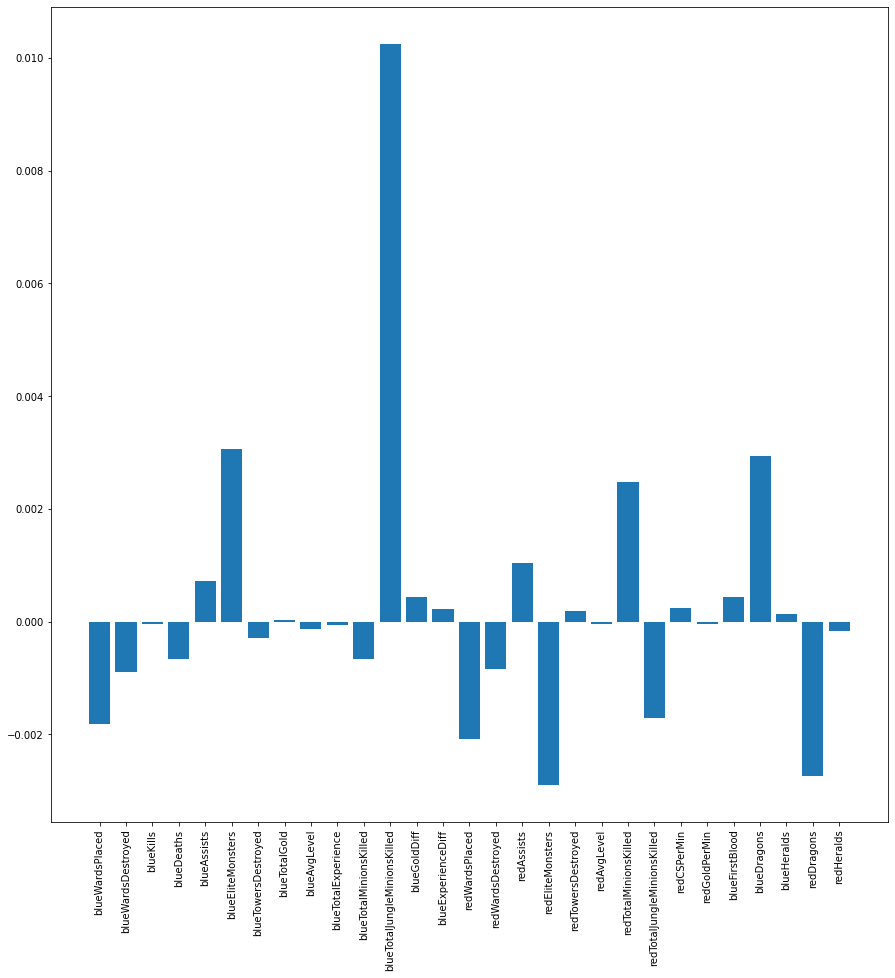

In [91]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
plt.bar(X.columns,model_lr.coef_[0,:])
plt.show()





### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

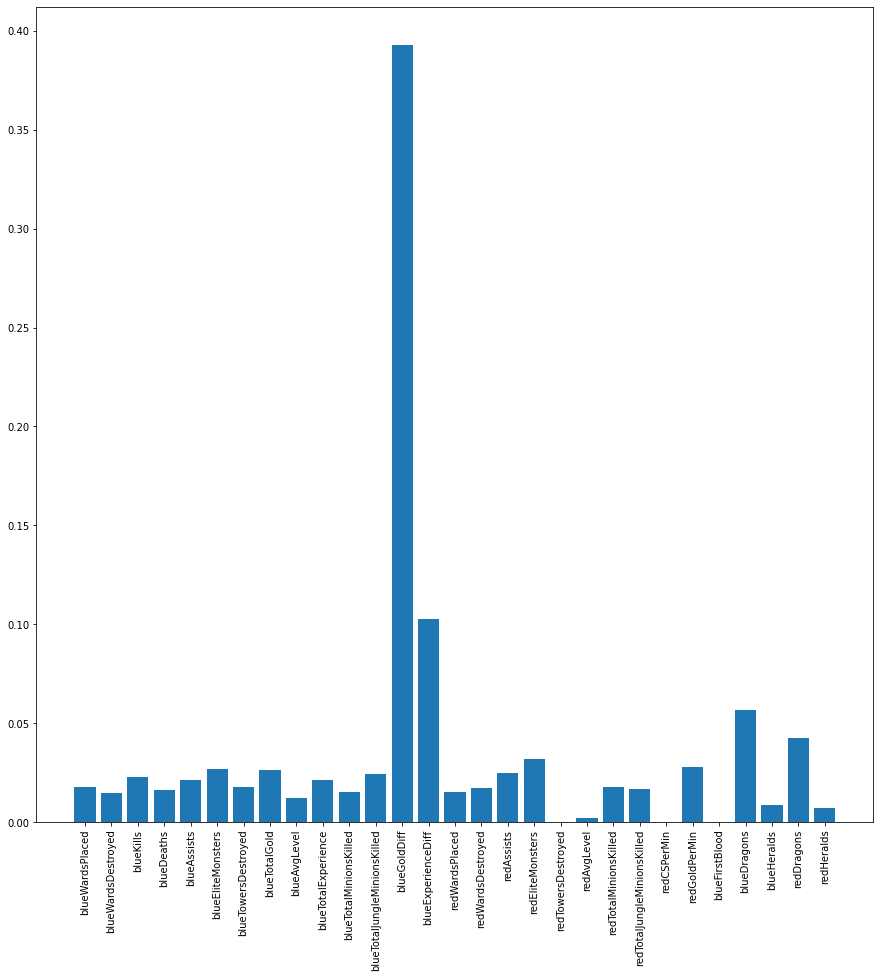

In [92]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
plt.bar(X.columns,model_xgb.feature_importances_)
plt.show()


